In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
connection = sqlite3.connect('data/checking-logs.sqlite')

In [3]:
checker_query = """
SELECT uid, numTrials, timestamp
FROM checker
WHERE status = 'ready'
AND uid LIKE 'user_%'
AND labname = 'project1'
ORDER BY uid
"""
checker_df = pd.read_sql_query(checker_query, connection)

In [4]:
checker_df['timestamp'] = pd.to_datetime(checker_df['timestamp'])

In [5]:
checker_df.sort_values(by='timestamp')

,uid,numTrials,timestamp
777,user_4,1,2020-04-17 05:19:02.744528
778,user_4,2,2020-04-17 05:22:45.549397
779,user_4,3,2020-04-17 05:34:24.422370
780,user_4,4,2020-04-17 05:43:27.773992
781,user_4,5,2020-04-17 05:46:32.275104
...,...,...,...
278,user_19,26,2020-05-15 10:22:39.698523
279,user_19,27,2020-05-15 10:22:46.248162
280,user_19,28,2020-05-15 10:23:18.043212
656,user_28,27,2020-05-15 10:38:14.430013


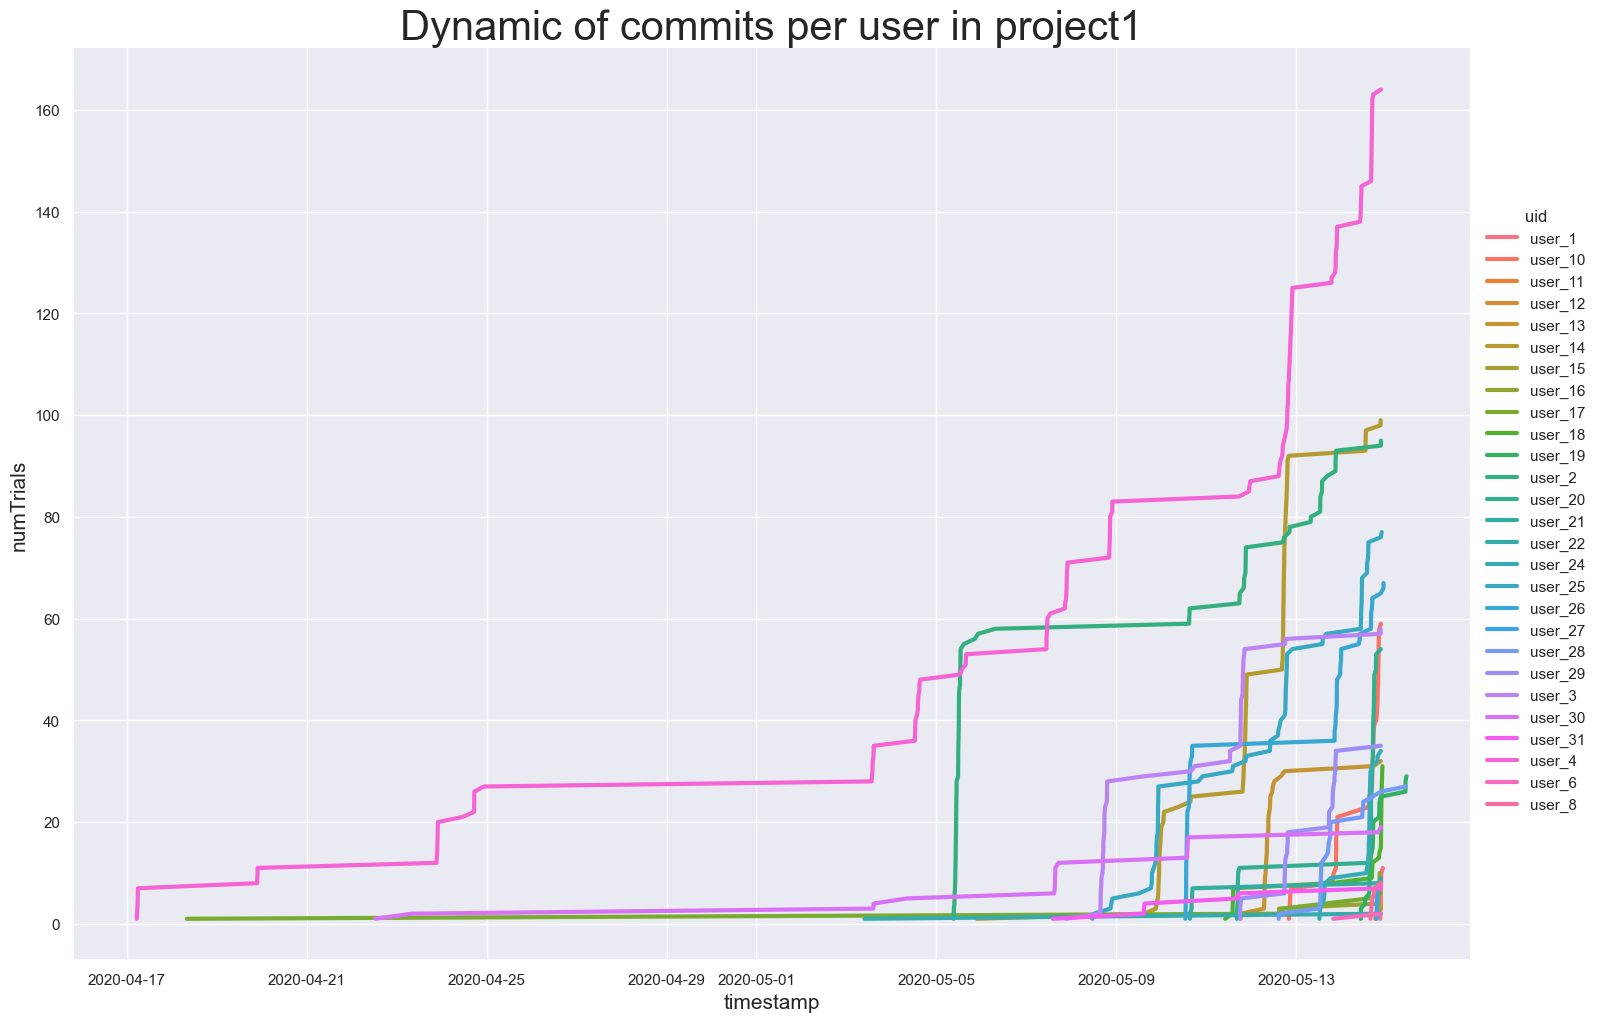

In [6]:
sns.set(rc={'axes.labelsize': 15,
            'lines.linewidth': 3})
sns.relplot(
    data=checker_df,
    x='timestamp',
    y='numTrials',
    hue='uid',
    linewidth=3,
    legend='full',
    kind='line',
    height=10,
    aspect=1.5
)
plt.title('Dynamic of commits per user in project1', fontsize=30)
plt.show()

In [7]:
connection.close()

In [8]:
checker_df['cumulative_numTrials'] = checker_df.groupby('uid')['numTrials'].cumsum()
leader_df = checker_df.loc[checker_df.groupby('timestamp')['cumulative_numTrials'].idxmax()]
leader_time = leader_df['uid'].value_counts()

Какой пользователь был лидером по количеству коммитов почти все время?

In [9]:
leader_all_time = leader_time.idxmax()
print(f'Ответ: {leader_all_time}')

Ответ: user_4


Какой пользователь был лидером только короткий промежуток времени?

In [10]:
leader_short_time = leader_time.idxmin()
print(f'Ответ: {leader_short_time}')

Ответ: user_11
